In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand


data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', names = data_names)

In [2]:
all_vals = data.drop(columns=['label']).values.tolist()

In [3]:
def random_centroids(all_vals, K):    
    centroids = []
    for i in range(K):
        centroid = all_vals[rand.randint(0, 149)]
        centroids.append(centroid)
    return centroids

In [4]:
def assign_cluster(all_vals, centroids):
    assignments = []

    for data_point in all_vals:
        dist_point_clust = []

        for centroid in centroids:
            d_clust = np.linalg.norm(np.array(data_point) - np.array(centroid))
            dist_point_clust.append(d_clust)
        
        assignment = np.argmin(dist_point_clust)
        assignments.append(assignment)

    return assignments  

In [5]:
def new_centroids(all_vals, centroids, assignments, K):
    new_centroids = []
    for i in range(K):
        pt_cluster = []
        for x in range(len(all_vals)):
                if (assignments[x] == i):
                    pt_cluster.append(all_vals[x])
        mean_c = np.mean(pt_cluster, axis=0)
        new_centroids.append(mean_c)

    return new_centroids

In [6]:
def sse(all_vals, assignments, centroids):
    errors = []
    
    for i in range(len(all_vals)):
        centroid = centroids[assignments[i]]
    
        error = np.linalg.norm(np.array(all_vals[i]) - np.array(centroid))
        
        errors.append(error**2)
        
    sse = sum(errors)
    
    return sse

In [7]:
def kmeans_clustering(all_vals,K,max_iter = 100, tol = pow(10,-3) ):
    it = -1
    all_sse = []
    assignments = []
    
    #Place K centroids at random locations
    centroids = random_centroids(all_vals, K)

   
    #Until algorithm converges
    while (len(all_sse)<=1 or (it < max_iter and np.absolute(all_sse[it] - all_sse[it-1])/all_sse[it-1] >= tol)):
        it += 1
        #Assign all data points to the closest center
        assignments = assign_cluster(all_vals, centroids)
        
        #Compute the new centroids
        centroids = new_centroids(all_vals, centroids, assignments, K)
        
        #Compute SSE
        sse_kmeans = sse(all_vals, assignments, centroids)
        all_sse.append(sse_kmeans)        
        
     
    return (assignments, centroids, all_sse, it)

In [8]:
result = kmeans_clustering(all_vals,K=3)

In [9]:
centroids_x = [result[1][x][0] for x in range(len(result[1]))] #sepal_length: [0] 
centroids_y = [result[1][x][2] for x in range(len(result[1]))] #petal_length: [2]

In [10]:
x = data['sepal_length']
y = data['petal_length']
assignments = result[0]

Text(0, 0.5, 'petal_length')

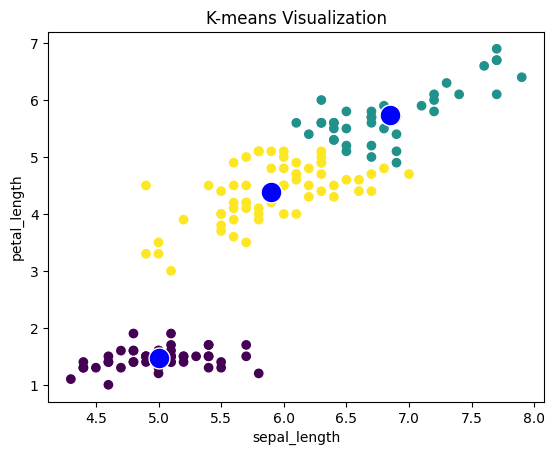

In [11]:
plt.scatter(x, y, c=assignments)
plt.plot(centroids_x,centroids_y, c='white', marker='.', linewidth='0.01', markerfacecolor='blue', markersize=30)

plt.title("K-means Visualization")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")